In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

%pylab inline
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
import cv2
from itertools import product


Populating the interactive namespace from numpy and matplotlib


In [2]:
def intersection_over_union(target, prediction):
    # https://www.jeremyjordan.me/evaluating-image-segmentation-models/
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)

    # return the intersection over union value
    return iou_score

In [5]:
# DAVIS query information
davis = ['17']
annot = ['annot1', 'annot2']

# image path
IMAGE_DIR = '../../../datasets/'
PRED_DIR = '../../data/'
frame = 0


 >> Annot:  annot1  >> Seq:  aerobatics
 REFCOCO >> IOU:  [0.0, 0.00017514668534897976, 0.37766544978002436]
 REFCOCO+ >> IOU:  [0.0, 0.0, 0.37766544978002436]
 REFCOCOg >> IOU:  [0.0, 0.00017514668534897976, 0.37766544978002436]
 >> Annot:  annot1  >> Seq:  car-race
 REFCOCO >> IOU:  [0.0, 0.0, 0.0, 0.08900720713849908]
 REFCOCO+ >> IOU:  [0.0, 0.0, 0.0, 0.08900720713849908]
 REFCOCOg >> IOU:  [0.0, 0.0, 0.0, 0.08900720713849908]
 >> Annot:  annot1  >> Seq:  carousel
 REFCOCO >> IOU:  [0.8590636383115492, 0.0, 0.0, 0.6095708775313404]
 REFCOCO+ >> IOU:  [0.0, 0.0, 0.0, 0.6095708775313404]
 REFCOCOg >> IOU:  [0.0, 0.0, 0.0, 0.6095708775313404]
 >> Annot:  annot1  >> Seq:  cats-car
 REFCOCO >> IOU:  [0.0, 0.2001445739586157, 0.884530088707744, 0.6309068406840684]
 REFCOCO+ >> IOU:  [0.0, 0.0, 0.884530088707744, 0.6309068406840684]
 REFCOCOg >> IOU:  [0.0, 0.2001445739586157, 0.884530088707744, 0.6309068406840684]
 >> Annot:  annot1  >> Seq:  chamaleon
 REFCOCO >> IOU:  [0.72356879224120

/imatge/alba.herrera/maskMattnet/MAttNet/venv2/local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 >> Annot:  annot1  >> Seq:  rollercoaster
 REFCOCO >> IOU:  [0.07958357432041642]
 REFCOCO+ >> IOU:  [0.07958357432041642]
 REFCOCOg >> IOU:  [0.07958357432041642]
 >> Annot:  annot1  >> Seq:  salsa
 REFCOCO >> IOU:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.09847454333462884, 0.0, 0.8143494377081109, 0.0013531799729364006, 0.789179190751445]
 REFCOCO+ >> IOU:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.09847454333462884, 0.0, 0.8143494377081109, 0.0013531799729364006, 0.0]
 REFCOCOg >> IOU:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.09732091415402343, 0.0, 0.0, 0.0, 0.0]
 >> Annot:  annot1  >> Seq:  seasnake
 REFCOCO >> IOU:  [0.6892862601253248]
 REFCOCO+ >> IOU:  [0.6892862601253248]
 REFCOCOg >> IOU:  [0.6892862601253248]
 >> Annot:  annot1  >> Seq:  skate-jump
 REFCOCO >> IOU:  [0.0, 0.8289745354439092]
 REFCOCO+ >> IOU:  [0.0, 0.8289745354439092]
 REFCOCOg >> IOU:  [0.0, 0.8289745354439092]
 >> Annot:  annot1  >> Seq:  slackline
 REFCOCO >> IOU:  [0.7573952199515067]
 REFCOCO+ >> IOU:  [0.7573952199515067]
 REFCOCOg >> I

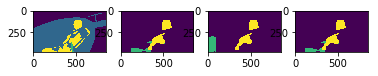

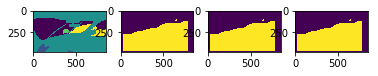

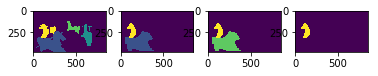

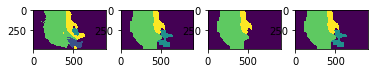

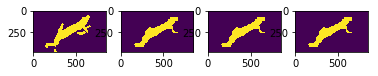

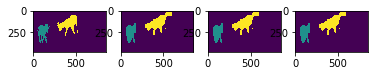

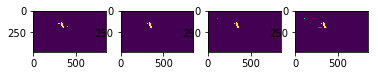

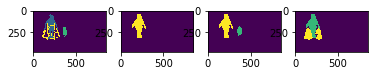

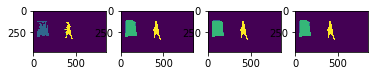

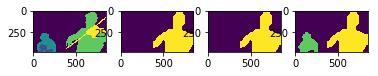

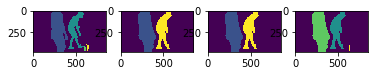

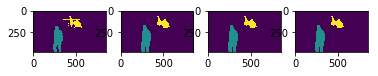

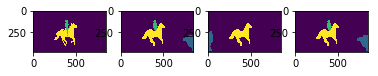

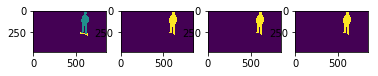

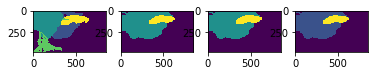

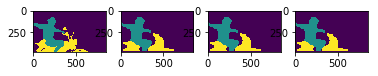

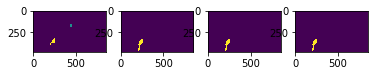

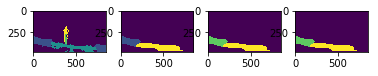

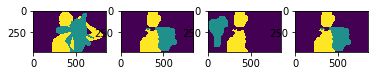

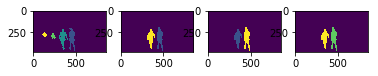

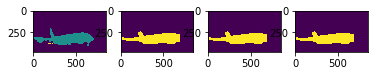

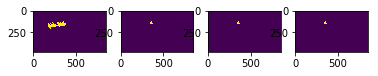

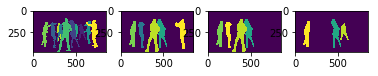

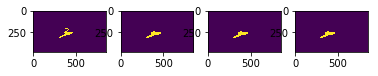

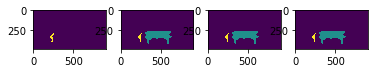

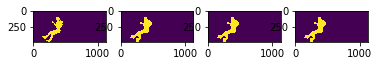

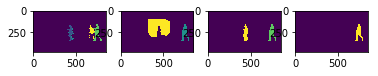

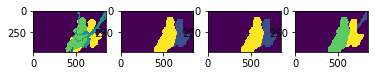

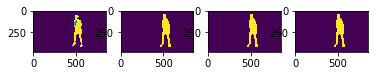

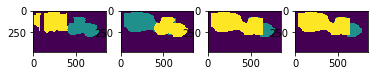

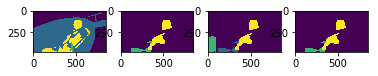

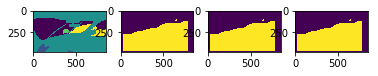

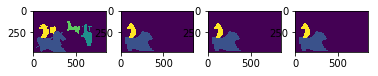

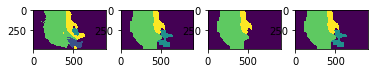

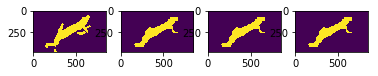

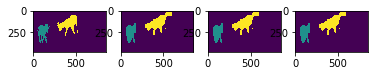

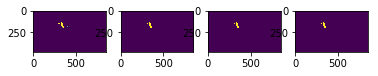

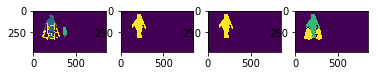

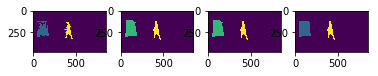

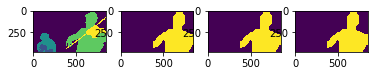

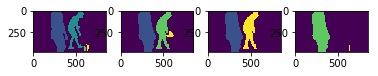

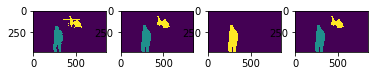

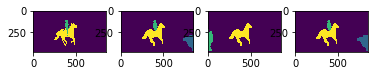

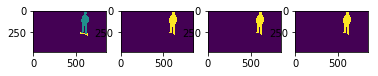

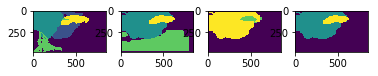

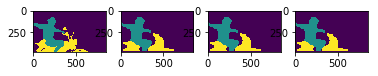

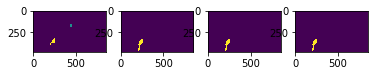

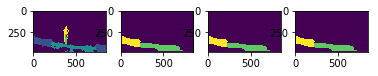

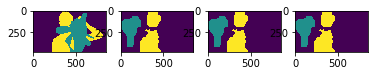

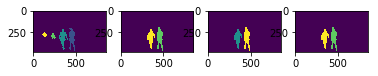

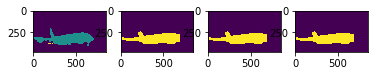

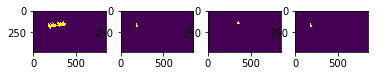

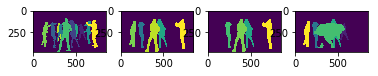

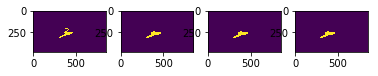

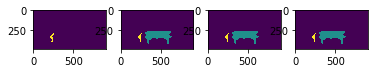

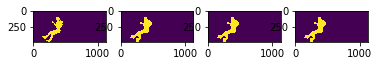

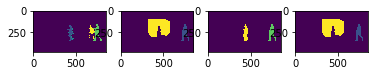

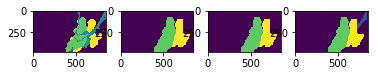

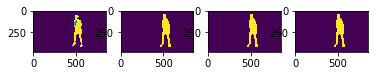

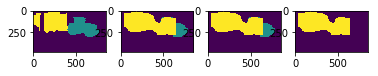

In [6]:

from IPython import embed
for d, a in product(davis, annot):
    
    img_path = os.path.join(IMAGE_DIR, 'DAVIS20' + d,'JPEGImages/480p/') # davis_path
    gt_path = os.path.join(IMAGE_DIR, 'DAVIS20' + d,'Annotations/480p/') # gt_path
    pred_path = os.path.join(PRED_DIR, 'DAVIS' + d + '_480p_RefCOCO') # pred_path
    global_iou = []
    global_iou1 = []
    global_iou2 = []
    for seq in sorted(os.listdir(img_path)):
        # show mask
        fig = plt.figure()

        # READ ANNOTATIONS
        gt_img = os.path.join(gt_path, seq, '%05d.png' % frame)
        annot = np.array(Image.open(gt_img)) 

        plt.subplot(141)
        plt.imshow(annot)

        # READ PREDICTIONS REFCOCO
        pred_img = os.path.join(pred_path, a, seq, '%05d.png' % frame)
        pred = np.array(Image.open(pred_img))

        plt.subplot(142)
        plt.imshow(pred)
        
        # READ PREDICTIONS REFCOCO+
        pred_img = os.path.join(pred_path + '+', a, seq, '%05d.png' % frame)
        pred1 = np.array(Image.open(pred_img))

        plt.subplot(143)
        plt.imshow(pred1)
        
        # READ PREDICTIONS REFCOCOg
        pred_img = os.path.join(pred_path + 'g', a, seq, '%05d.png' % frame)
        pred2 = np.array(Image.open(pred_img))

        plt.subplot(144)
        plt.imshow(pred2)

        # PROPOSALS VS GT
        k = np.unique(annot)[1:]
        iou_array = []
        iou_array1 = []
        iou_array2 = []
        for i in k:

            gt_mask = np.zeros(annot.shape)
            gt_mask[annot == i] = 1
            
            #REFCOCO
            pred_mask = np.zeros(pred.shape)
            pred_mask[pred == i] = 1
            # iou
            iou = intersection_over_union(gt_mask, pred_mask)
            iou_array.append(iou)
            global_iou.append(iou)
            
            #REFCOCO+
            pred_mask = np.zeros(pred1.shape)
            pred_mask[pred1 == i] = 1
            # iou
            iou = intersection_over_union(gt_mask, pred_mask)
            iou_array1.append(iou)
            global_iou1.append(iou)
            
            #REFCOCOg
            pred_mask = np.zeros(pred2.shape)
            pred_mask[pred2 == i] = 1
            # iou
            iou = intersection_over_union(gt_mask, pred_mask)
            iou_array2.append(iou)
            global_iou2.append(iou)
            
        print(" >> Annot: ", a, " >> Seq: ", seq)
        print(" REFCOCO >> IOU: ", iou_array)
        print(" REFCOCO+ >> IOU: ", iou_array1)
        print(" REFCOCOg >> IOU: ", iou_array2)
        
    print("----------- Global Statistics ----------")
    print(" >> Annot: ", a, " >>Mean IOU Score REFCOCO: ", np.mean(global_iou))
    print(" >> Annot: ", a, " >>Mean IOU Score REFCOCO+: ", np.mean(global_iou1))
    print(" >> Annot: ", a, " >>Mean IOU Score REFCOCOg: ", np.mean(global_iou2))

In [4]:
from IPython import embed
for d, a in product(davis, annot):
    
    img_path = os.path.join(IMAGE_DIR, 'DAVIS' + d,'JPEGImages/480p/') # davis_path
    gt_path = os.path.join(IMAGE_DIR, 'DAVIS' + d,'Annotations/480p/') # gt_path
    pred_path = os.path.join(PRED_DIR, 'DAVIS' + d + '_480p_masks', a) # pred_path
    
    global_iou = []
    for seq in sorted(os.listdir(pred_path)):

        # READ ANNOTATIONS
        gt_img = os.path.join(gt_path, seq, '%05d.png' % frame)
        annot = np.array(Image.open(gt_img)) 


        # READ PREDICTIONS
        pred_img = os.path.join(pred_path, seq, '%05d.png' % frame)
        pred = np.array(Image.open(pred_img))


        # PROPOSALS VS GT
        k = np.unique(annot)[1:]
        iou_array = []
        for i in k:

            gt_mask = np.zeros(annot.shape)
            gt_mask[annot == i] = 1

            pred_mask = np.zeros(pred.shape)
            pred_mask[pred == i] = 1

            # iou
            iou = intersection_over_union(gt_mask, pred_mask)
            iou_array.append(iou)
            global_iou.append(iou)
            
        max_ind = np.argmax(iou_array)
        
        
        print(" >> Annot: ", a, " >> Sequence: ", seq, " >>Max IOU: ", iou_array)
                
    print("----------- Global Statistics ----------")
    print(" >> Annot: ", a, " >>Mean IOU Score: ", np.mean(global_iou))

 >> Annot:  annot1  >> Sequence:  aerobatics  >>Max IOU:  [0.0, 0.00017514668534897976, 0.37766544978002436]
 >> Annot:  annot1  >> Sequence:  bear  >>Max IOU:  [0.8870790595506245]
 >> Annot:  annot1  >> Sequence:  bike-packing  >>Max IOU:  [0.6214732787674531, 0.8473724231159175]
 >> Annot:  annot1  >> Sequence:  bike-trial  >>Max IOU:  [0.7893538532480259, 0.40622004741966405]
 >> Annot:  annot1  >> Sequence:  blackswan  >>Max IOU:  [0.8327777202608966]
 >> Annot:  annot1  >> Sequence:  bmx-bumps  >>Max IOU:  [0.26017375400091447, 0.7415658232489916]
 >> Annot:  annot1  >> Sequence:  bmx-trees  >>Max IOU:  [0.4037745219766576, 0.8229223248234655]
 >> Annot:  annot1  >> Sequence:  boat  >>Max IOU:  [0.6637322933990939]
 >> Annot:  annot1  >> Sequence:  boxing  >>Max IOU:  [0.8970199092741935, 0.8883037258292721, 0.7872971558192288]
 >> Annot:  annot1  >> Sequence:  boxing-fisheye  >>Max IOU:  [0.0, 0.8565621370499419, 0.86590943741424]
 >> Annot:  annot1  >> Sequence:  breakdance  >>